In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing
import datetime as dt # date and time processing functions
import itertools
import matplotlib.pyplot as plt # basic plotting 
from matplotlib.offsetbox import AnchoredText
plt.style.use('ggplot') # use ggplot style
%matplotlib inline 

In [9]:
# read in the data from the provided csv file
df = pd.read_csv('seaice_extent_daily_v3.0.csv')

# drop the 'Source Data' column as it obscures more useful columns and doesn't tell us much
df.drop('Source Data', axis = 1, inplace = True)

# convert the provided 3 column date format to datetime format and set it as the index
df['Date'] = pd.to_datetime(df[['Year','Month','Day']])
df.index = df['Date'].values

# split according to hemisphere, as we are expecting different trends for each
north = df[df['hemisphere'] == 'north']
south = df[df['hemisphere'] == 'south']

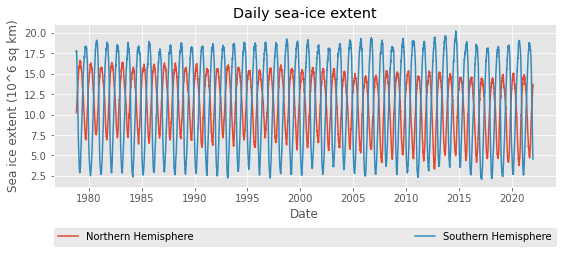

In [10]:
plt.figure(figsize=(9,3))
plt.plot(north.index,north['Extent'], label='Northern Hemisphere')
plt.plot(south.index,south['Extent'], label='Southern Hemisphere')

# add plot legend and titles
plt.legend(bbox_to_anchor=(0., -.362, 1., .102), loc=3, ncol=2, 
           mode="expand", borderaxespad=0.)
plt.ylabel('Sea ice extent (10^6 sq km)')
plt.xlabel('Date')
plt.title('Daily sea-ice extent');

(1978.0, 2022.0)

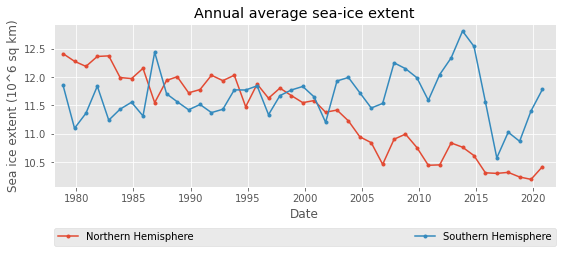

In [12]:
# resample raw data into annual averages
northyear = north.resample('12M').mean()
southyear = south.resample('12M').mean()

# remove the initial and final item as they aer averaged incorrectly (also indexes seem bad)
northyear = northyear[1:-1]
southyear = southyear[1:-1]

plt.figure(figsize=(9,3))
plt.plot(northyear.Year,northyear['Extent'], marker = '.', label='Northern Hemisphere')
plt.plot(southyear.Year,southyear['Extent'], marker = '.', label='Southern Hemisphere')

# add plot legend and titles
plt.legend(bbox_to_anchor=(0., -.362, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel('Sea ice extent (10^6 sq km)')
plt.xlabel('Date')
plt.title('Annual average sea-ice extent')
plt.xlim(1978, 2022)
